importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import joblib

import data 

In [47]:
url = 'http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
df=pd.read_excel(url,engine='xlrd')
#df = pd.read_excel(r'C:\Users\MAIKO\Desktop\MYDOCS\MINE\school\ProjectA\data\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


General data EDA

In [48]:
print("Dataset Shape:", df.shape)


Dataset Shape: (1200, 28)


In [49]:
print("\nColumns and Data Types:")
print(df.dtypes)


Columns and Data Types:
EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64


In [50]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


In [51]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
               Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                    

Mapping  Perfomace Labels

In [52]:
perf_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
df['PerformanceRatingLabel'] = df['PerformanceRating'].map(perf_map)

Plotting Perfomance Label

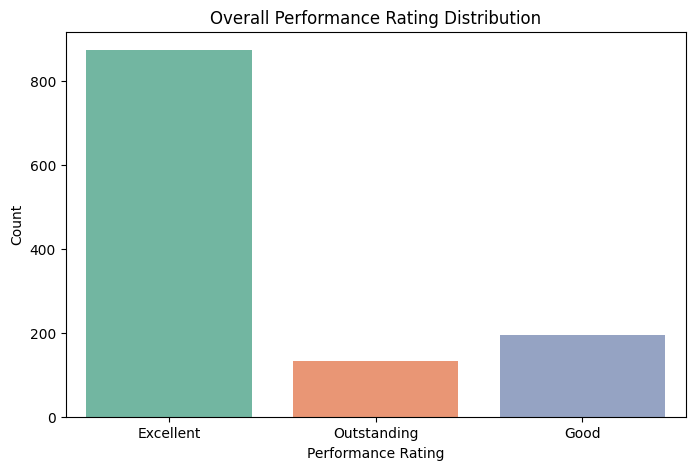

In [54]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PerformanceRatingLabel', data=df, palette='Set2')
plt.title('Overall Performance Rating Distribution')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.savefig('performance_distribution.png')
plt.show()

Plotting Salary Hike Distribution

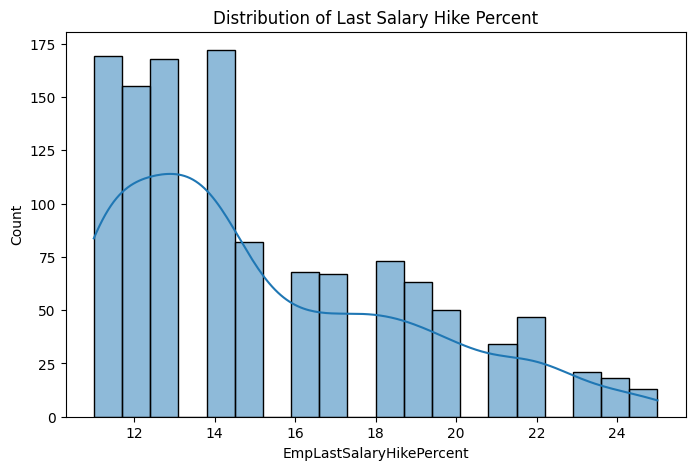

In [56]:

plt.figure(figsize=(8, 5))
sns.histplot(df['EmpLastSalaryHikePercent'], bins=20, kde=True)
plt.title('Distribution of Last Salary Hike Percent')
plt.savefig('salary_hike_distribution.png')
plt.show()

In [ ]:
Department wise perfomance

In [57]:
dept_perf = df.groupby('EmpDepartment')['PerformanceRatingLabel'].value_counts(normalize=True).unstack().fillna(0)
print("\nDepartment-wise Performance Distribution (Proportions):")
print(dept_perf)


Department-wise Performance Distribution (Proportions):
PerformanceRatingLabel  Excellent      Good  Outstanding
EmpDepartment                                           
Data Science             0.850000  0.050000     0.100000
Development              0.842105  0.036011     0.121884
Finance                  0.612245  0.306122     0.081633
Human Resources          0.703704  0.185185     0.111111
Research & Development   0.682216  0.198251     0.119534
Sales                    0.672922  0.233244     0.093834


Visualize

<Figure size 1000x600 with 0 Axes>

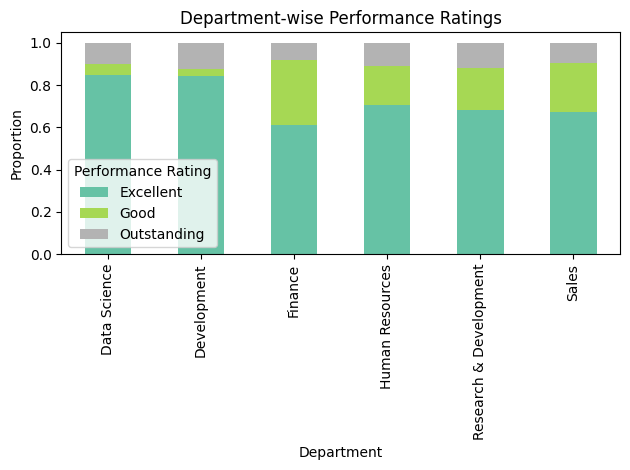

In [58]:
plt.figure(figsize=(10, 6))
dept_perf.plot(kind='bar', stacked=True, cmap='Set2')
plt.title('Department-wise Performance Ratings')
plt.xlabel('Department')
plt.ylabel('Proportion')
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.savefig('dept_performance.png')
plt.show()

Top 3 Factors Affecting Performance

In [59]:
le = LabelEncoder()
df_encoded = df.copy()
categorical_cols = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 
                   'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])

X = df_encoded.drop(['EmpNumber', 'PerformanceRating', 'PerformanceRatingLabel'], axis=1)
y = df_encoded['PerformanceRating']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 3 Factors Affecting Employee Performance:")
print(feature_importance.head(3))


Top 3 Factors Affecting Employee Performance:
                       Feature  Importance
16    EmpLastSalaryHikePercent    0.214712
9   EmpEnvironmentSatisfaction    0.214228
23     YearsSinceLastPromotion    0.093374


Visualize

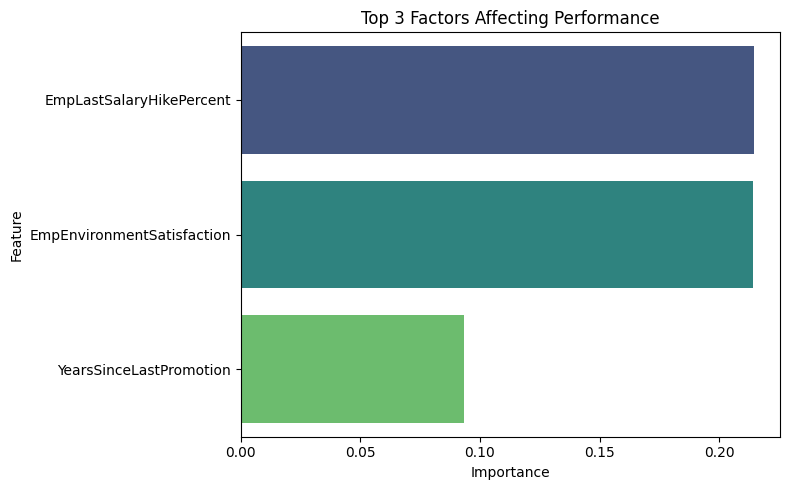

In [60]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(3), palette='viridis')
plt.title('Top 3 Factors Affecting Performance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

Train Predictive Model

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

y_test_labels = [perf_map[i] for i in y_test]
y_pred_labels = [perf_map[i] for i in y_pred]

print("\nModel Performance Evaluation:")
print(classification_report(y_test_labels, y_pred_labels))


Model Performance Evaluation:
              precision    recall  f1-score   support

   Excellent       0.95      0.98      0.97       184
        Good       0.93      0.90      0.91        29
 Outstanding       0.95      0.74      0.83        27

    accuracy                           0.95       240
   macro avg       0.94      0.87      0.90       240
weighted avg       0.95      0.95      0.94       240



Confusion Matrix

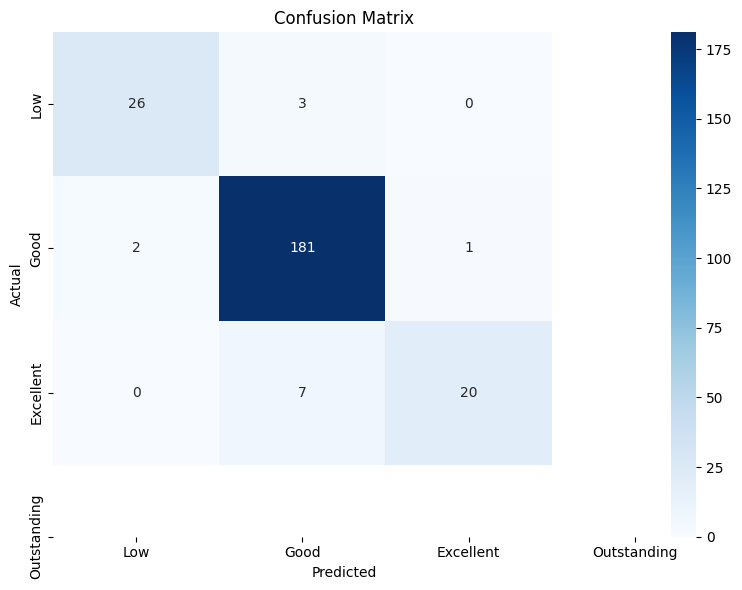

In [62]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Good', 'Excellent', 'Outstanding'],
            yticklabels=['Low', 'Good', 'Excellent', 'Outstanding'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

Save model

In [70]:
joblib.dump(rf, 'employee_performance_model.pkl')

['employee_performance_model.pkl']

Recommendations

In [65]:
print("\nRecommendations to Improve Employee Performance:")
print("1. Improve Workplace Environment: Enhance facilities and recognition programs, especially in Sales and Development, to boost environment satisfaction.")
print("2. Fair Salary Hikes: Implement competitive salary adjustments to motivate employees, particularly in underperforming departments.")
print("3. Reduce Overtime: Manage workloads to limit overtime, preventing burnout in Sales where travel is frequent.")
print("4. Smart Hiring: Use the predictive model to screen candidates with high environment satisfaction and balanced work profiles.")


Recommendations to Improve Employee Performance:
1. Improve Workplace Environment: Enhance facilities and recognition programs, especially in Sales and Development, to boost environment satisfaction.
2. Fair Salary Hikes: Implement competitive salary adjustments to motivate employees, particularly in underperforming departments.
3. Reduce Overtime: Manage workloads to limit overtime, preventing burnout in Sales where travel is frequent.
4. Smart Hiring: Use the predictive model to screen candidates with high environment satisfaction and balanced work profiles.
